# 演習3
図3のモデルを練習問題1からの問題に対してシミュレートします。特に、φ = vp、εp = εu = 0と初期化し、次の5単位時間のためのそれらの値を見つけます。

練習問題3の解答は図2(b)に示されています。モデルは図2(a)と同じ値に収束しますが、収束はより遅くなります。なぜなら、モデルには興奮性および抑制性接続によって接続された複数のノードが含まれるようになり、そのようなネットワークは振動傾向を持つため、これらの振動が収まってネットワークが収束する必要があるからです。

演習 1の説明は以下。   
光の強度u = 2を観測したとし、その受容体のノイズレベルがΣu = 1、サイズの事前期待の平均と分散がvp = 3およびΣp = 1であると仮定します。サイズの事後確率を0.01から5まで計算し、それらをプロットするコンピュータプログラムを書きます。

In [4]:
import numpy as np

# 初期設定
v_p = 3      # 食物のサイズの事前分布の平均
sigma_p = 1  # 事前分布の分散
sigma_u = 1  # 感覚ノイズの分散
u = 2        # 観測された光の強度
DT = 0.01    # 積分のステップ
MAXT = 5     # 考慮される最大時間
time_steps = int(MAXT / DT)  # 時間ステップの総数を計算

# 配列の初期化
phi = np.zeros(time_steps)      # 食物のサイズの推測値を格納する配列
error_p = np.zeros(time_steps)  # 食物のサイズの予測誤差を格納する配列
error_u = np.zeros(time_steps)  # 感覚入力の予測誤差を格納する配列

# 初期値の設定
phi[0] = v_p
error_p[0] = 0
error_u[0] = 0

# メインループ
for i in range(1, time_steps):
    # 食物のサイズの推測値の更新
    phi[i] = phi[i-1] + DT * (error_u[i-1] * (2 * phi[i-1]) - error_p[i-1])
    # 食物サイズの予測誤差の更新
    # 興奮性入力:  食物のサイズの事前分布の平均(v_p)
    # 抑制性入力1: 食物のサイズの事前分布の分散(sigma_p) * 食物のサイズの予測誤差(error_p[i-1])
    # 抑制性入力2: 食物のサイズの事前分布の平均(v_p)
    error_p[i] = error_p[i-1] + DT * (phi[i-1] - v_p - sigma_p * error_p[i-1])
    # 感覚入力の予測誤差の更新
    # 興奮性入力: 観測された光の強度(u)
    # 抑制性入力: g(phai): 食べ物のサイズから光の強さを推測する関数(phi[i-1])^2)
    # 抑制性入力: 感覚ノイズの分散(sigma_u) * 感覚入力の予測誤差(error_u[i-1])
    error_u[i] = error_u[i-1] + DT * (u - phi[i-1]**2 - sigma_u * error_u[i-1])


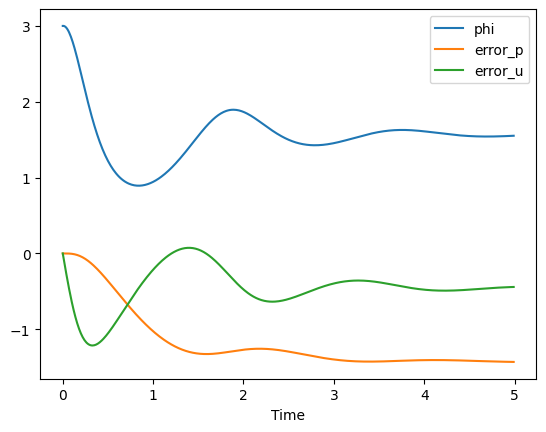

In [5]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(0, MAXT, DT), phi, label='phi')
plt.plot(np.arange(0, MAXT, DT), error_p, label='error_p')
plt.plot(np.arange(0, MAXT, DT), error_u, label='error_u')
plt.xlabel('Time')
plt.legend()
plt.show()


# 感覚入力の精度が非常に低い場合
-> 事前分布(v_p=3)に近い箇所で均衡する

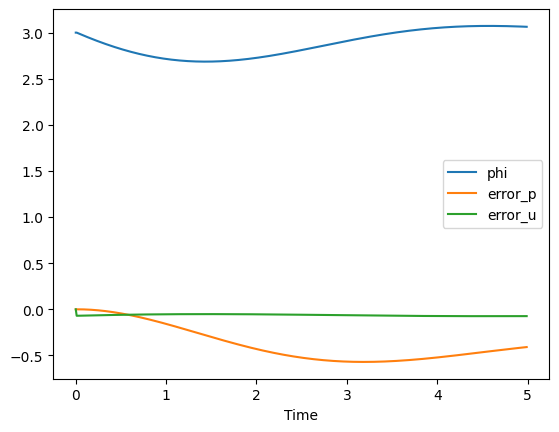

In [33]:
import numpy as np

# 初期設定
v_p = 3            # 食物のサイズの事前分布の平均
sigma_p = 0.1      # 事前分布の分散
sigma_u = 100  # 感覚ノイズの分散
u = 2        # 観測された光の強度
DT = 0.01    # 積分のステップ
MAXT = 5     # 考慮される最大時間
time_steps = int(MAXT / DT)  # 時間ステップの総数を計算

# 配列の初期化
phi = np.zeros(time_steps)      # 食物のサイズの推測値を格納する配列
error_p = np.zeros(time_steps)  # 食物のサイズの予測誤差を格納する配列
error_u = np.zeros(time_steps)  # 感覚入力の予測誤差を格納する配列

# 初期値の設定
phi[0] = v_p
error_p[0] = 0
error_u[0] = 0

# メインループ
for i in range(1, time_steps):
    phi[i] = phi[i-1] + DT * (error_u[i-1] * (2 * phi[i-1]) - error_p[i-1])
    error_p[i] = error_p[i-1] + DT * (phi[i-1] - v_p - sigma_p * error_p[i-1])
    error_u[i] = error_u[i-1] + DT * (u - phi[i-1]**2 - sigma_u * error_u[i-1])

import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(0, MAXT, DT), phi, label='phi')
plt.plot(np.arange(0, MAXT, DT), error_p, label='error_p')
plt.plot(np.arange(0, MAXT, DT), error_u, label='error_u')
plt.xlabel('Time')
plt.legend()
plt.show()


# 事前分布の精度が非常に低い場合
-> 事前分布の平均と観測値の間で振動して均衡をもたない


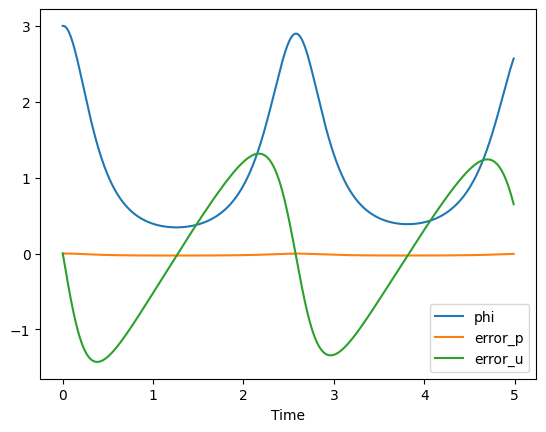

In [35]:
import numpy as np

# 初期設定
v_p = 3            # 食物のサイズの事前分布の平均
sigma_p = 100      # 事前分布の分散
sigma_u = 0.1  # 感覚ノイズの分散
u = 2        # 観測された光の強度
DT = 0.01    # 積分のステップ
MAXT = 5     # 考慮される最大時間
time_steps = int(MAXT / DT)  # 時間ステップの総数を計算

# 配列の初期化
phi = np.zeros(time_steps)      # 食物のサイズの推測値を格納する配列
error_p = np.zeros(time_steps)  # 食物のサイズの予測誤差を格納する配列
error_u = np.zeros(time_steps)  # 感覚入力の予測誤差を格納する配列

# 初期値の設定
phi[0] = v_p
error_p[0] = 0
error_u[0] = 0

# メインループ
for i in range(1, time_steps):
    phi[i] = phi[i-1] + DT * (error_u[i-1] * (2 * phi[i-1]) - error_p[i-1])
    error_p[i] = error_p[i-1] + DT * (phi[i-1] - v_p - sigma_p * error_p[i-1])
    error_u[i] = error_u[i-1] + DT * (u - phi[i-1]**2 - sigma_u * error_u[i-1])

import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(0, MAXT, DT), phi, label='phi')
plt.plot(np.arange(0, MAXT, DT), error_p, label='error_p')
plt.plot(np.arange(0, MAXT, DT), error_u, label='error_u')
plt.xlabel('Time')
plt.legend()
plt.show()
